In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats.distributions as dist
from scipy import stats

# Načtení datového souboru

In [2]:
df_data = pd.read_csv('case0102.csv')

In [3]:
df_data.head()

,Salary,Sex
0,3900,Female
1,4020,Female
2,4290,Female
3,4380,Female
4,4380,Female


# Rozdělení na dvě pozorované skupiny

In [4]:
df_female = df_data[df_data['Sex'] == 'Female']
df_female

,Salary,Sex
0,3900,Female
1,4020,Female
2,4290,Female
3,4380,Female
4,4380,Female
...,...,...
56,6000,Female
57,6000,Female
58,6120,Female
59,6300,Female


In [5]:
df_male = df_data[df_data['Sex'] == 'Male']
df_male

,Salary,Sex
61,4620,Male
62,5040,Male
63,5100,Male
64,5100,Male
65,5220,Male
66,5400,Male
67,5400,Male
68,5400,Male
69,5400,Male
70,5400,Male


In [6]:
male_sal = df_male['Salary']
male_sal 

61    4620
62    5040
63    5100
64    5100
65    5220
66    5400
67    5400
68    5400
69    5400
70    5400
71    5700
72    6000
73    6000
74    6000
75    6000
76    6000
77    6000
78    6000
79    6000
80    6000
81    6000
82    6000
83    6000
84    6000
85    6300
86    6600
87    6600
88    6600
89    6840
90    6900
91    6900
92    8100
Name: Salary, dtype: int64

In [7]:
female_sal = df_female['Salary']
female_sal

0     3900
1     4020
2     4290
3     4380
4     4380
      ... 
56    6000
57    6000
58    6120
59    6300
60    6300
Name: Salary, Length: 61, dtype: int64

##  Pro každou skupinu zvlášť odhadněte střední hodnotu, rozptyl a medián příslušného rozdělení.

### Střední hodnota

In [40]:
print("Male střední hodnotu: ", male_sal.mean())
print("Female střední hodnotu: ", female_sal.mean())

Male střední hodnotu:  5956.875
Female střední hodnotu:  5138.852459016393


### Rozptyl

In [39]:
print("Male rozptyl: ", male_sal.var())
print("Female rozptyl: ", female_sal.var())

Male rozptyl:  477112.5
Female rozptyl:  291460.3278688525


### Medián

In [41]:
print("Male medián: ", male_sal.median())
print("Female medián: ", female_sal.median())

Male medián:  6000.0
Female medián:  5220.0


# "Pro každou skupinu zvlášť odhadněte hustotu a distribuční funkci pomocí histogramu a empirické distribuční funkce."

Text(0.5, 1.0, 'Female')

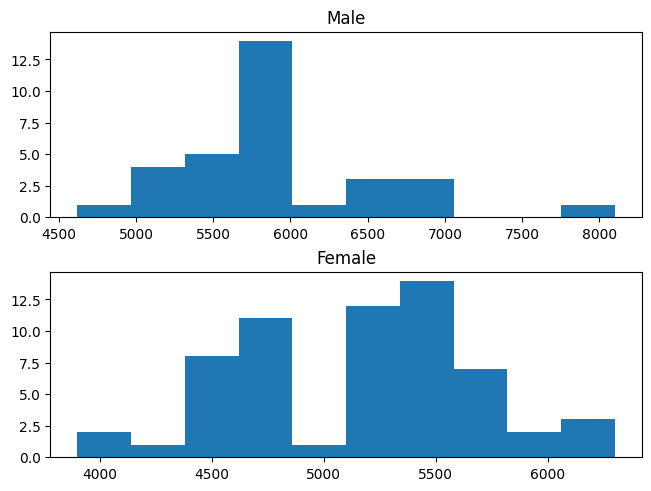

In [42]:
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1, constrained_layout=True)
ax1.hist(x=male_sal, bins=10)
ax1.set_title("Male")

ax2.hist(x=female_sal, bins=10)
ax2.set_title("Female")

## Uděláme hustoty pomoci normalizace

Text(0.5, 1.0, 'Female')

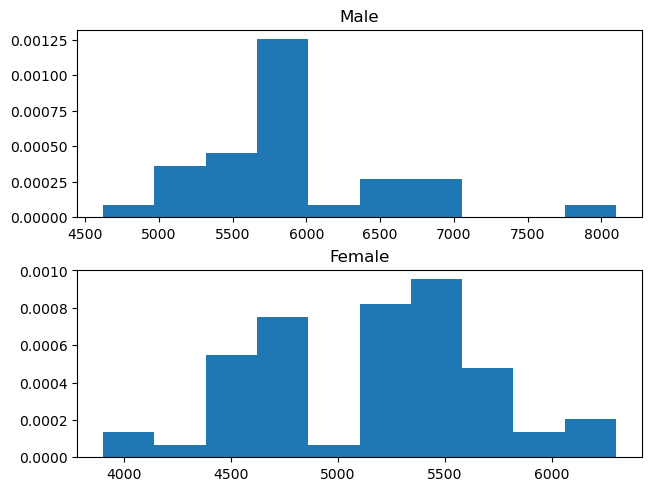

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1, constrained_layout=True)
ax1.hist(x=male_sal, bins=10, density=True)
ax1.set_title("Male")

ax2.hist(x=female_sal, bins=10, density=True)
ax2.set_title("Female")

Text(0.5, 1.0, 'Female')

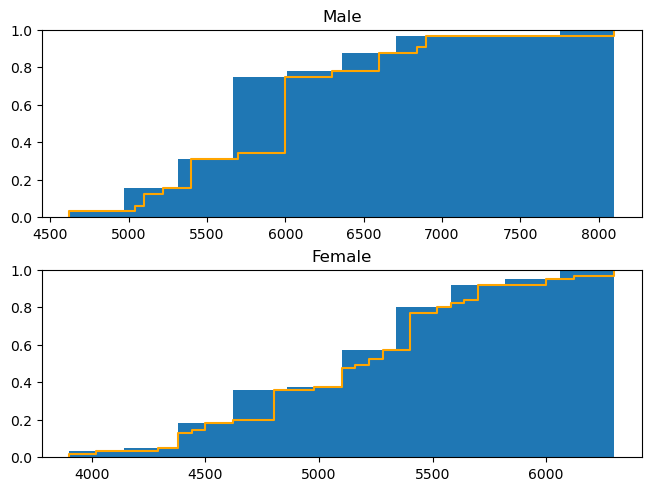

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1, constrained_layout=True)
ax1.hist(x=male_sal, bins=10, density=True, cumulative=True)
ax1.ecdf(x=male_sal, color='orange')
ax1.set_title("Male")

ax2.hist(x=female_sal, bins=10, density=True, cumulative=True)
ax2.ecdf(x=female_sal, color='orange')
ax2.set_title("Female")

# "Pro každou skupinu zvlášť najděte nejbližší rozdělení: Odhadněte parametry normálního, exponenciálního a rovnoměrného rozdělení. Zaneste příslušné hustoty s odhadnutými parametry do grafů histogramu. Diskutujte, které z rozdělení odpovídá pozorovaným datům nejlépe."

In [45]:
m_norm_mean_hat, m_norm_std_dev_hat = stats.norm.fit(male_sal)
print(m_norm_mean_hat, m_norm_std_dev_hat)

5956.875 679.8549362731729


In [46]:
f_norm_mean_hat, f_norm_std_dev_hat = stats.norm.fit(female_sal)
print(f_norm_mean_hat, f_norm_std_dev_hat)

5138.852459016393 535.4272029950178


In [33]:
m_expon_loc_hat, m_expon_scale_hat = stats.expon.fit(male_sal)
print(m_expon_loc_hat, m_expon_scale_hat)

4620.0 1336.875


In [34]:
f_expon_loc_hat, f_expon_scale_hat = stats.expon.fit(female_sal)
print(f_expon_loc_hat, f_expon_scale_hat)

3900.0 1238.8524590163934


In [35]:
m_uniform_a_hat, m_uniform_b_hat = stats.uniform.fit(male_sal)
print(m_uniform_a_hat, m_uniform_b_hat)

4620.0 3480.0


In [36]:
f_uniform_a_hat, f_uniform_b_hat = stats.uniform.fit(female_sal)
print(f_uniform_a_hat, f_uniform_b_hat)

3900.0 2400.0


In [37]:
print(male_sal.min())
print(male_sal.max())
print(male_sal.max() - male_sal.min())

4620
8100
3480


## Normální rozdělení pro muže a ženy

Text(0.5, 1.0, 'Female')

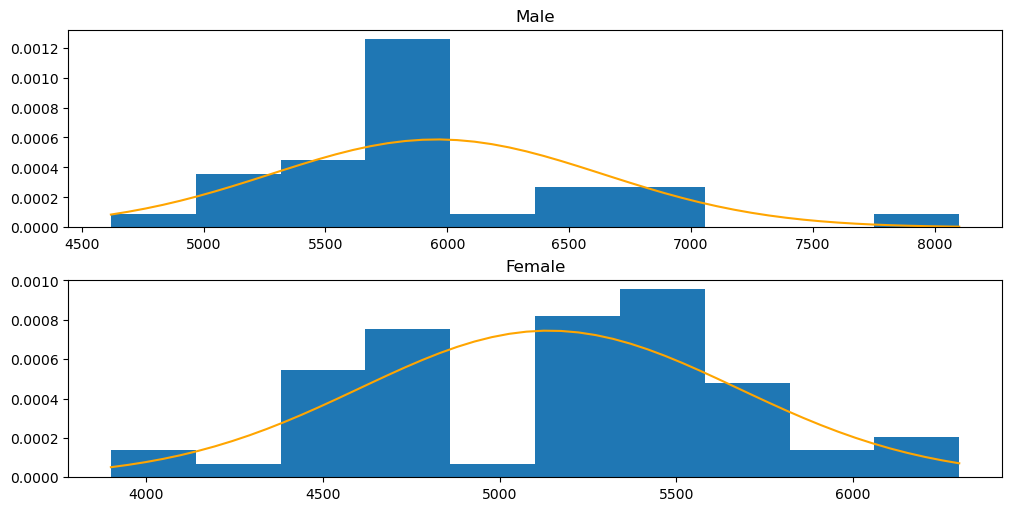

In [38]:
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, constrained_layout=True, figsize=(10, 5)
)
ax1.hist(x=male_sal, bins=10, density=True)
m_x_values = np.linspace(male_sal.min(), male_sal.max(), 50)

ax1.plot(
    m_x_values,
    stats.norm.pdf(x=m_x_values, loc=m_norm_mean_hat, scale=m_norm_std_dev_hat),
    color="orange"
)
ax1.set_title("Male")


ax2.hist(x=female_sal, bins=10, density=True)

f_x_values = np.linspace(female_sal.min(), female_sal.max(), 50)
ax2.plot(
    f_x_values,
    stats.norm.pdf(x=f_x_values, loc=f_norm_mean_hat, scale=f_norm_std_dev_hat),
    color="orange"
)
ax2.set_title("Female")

## Exponenciální rozdělení pro muže a ženy

Text(0.5, 1.0, 'Female')

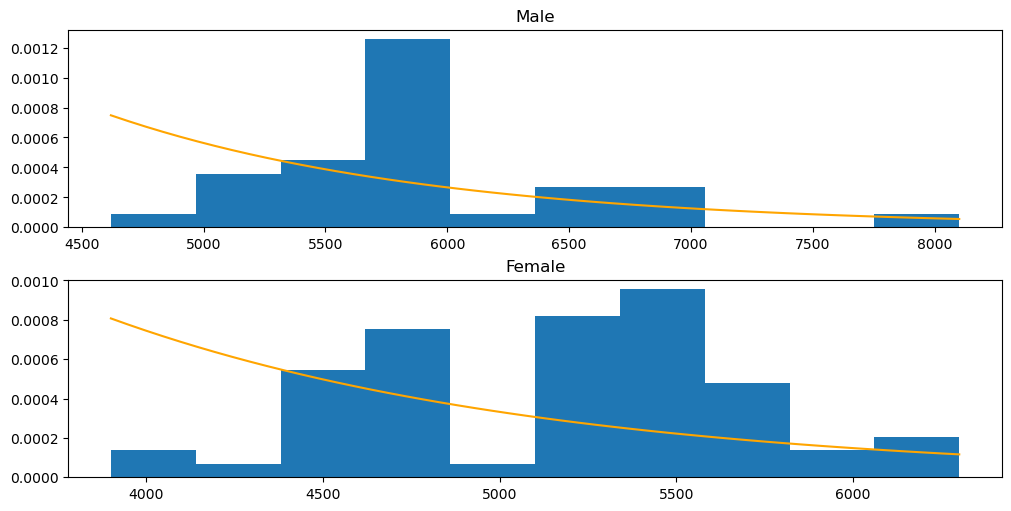

In [39]:
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, constrained_layout=True, figsize=(10, 5)
)
ax1.hist(x=male_sal, bins=10, density=True)
m_x_values = np.linspace(male_sal.min(), male_sal.max(), 50)

ax1.plot(
    m_x_values,
    stats.expon.pdf(x=m_x_values, loc=m_expon_loc_hat, scale=m_expon_scale_hat),
    color="orange"
)
ax1.set_title("Male")


ax2.hist(x=female_sal, bins=10, density=True)

f_x_values = np.linspace(female_sal.min(), female_sal.max(), 50)
ax2.plot(
    f_x_values,
    stats.expon.pdf(x=f_x_values, loc=f_expon_loc_hat, scale=f_expon_scale_hat),
    color="orange"
)
ax2.set_title("Female")

## Uniformní rozdělení pro muže a ženy

Text(0.5, 1.0, 'Female')

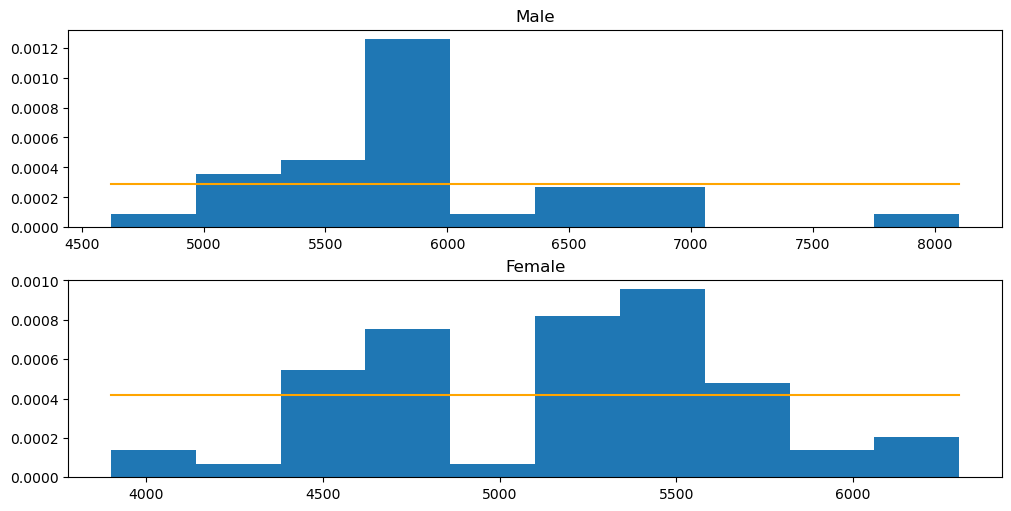

In [40]:
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, constrained_layout=True, figsize=(10, 5)
)
ax1.hist(x=male_sal, bins=10, density=True)
m_x_values = np.linspace(male_sal.min(), male_sal.max(), 50)

ax1.plot(
    m_x_values,
    stats.uniform.pdf(x=m_x_values, loc=m_uniform_a_hat, scale=m_uniform_b_hat),
    color="orange"
)
ax1.set_title("Male")


ax2.hist(x=female_sal, bins=10, density=True)

f_x_values = np.linspace(female_sal.min(), female_sal.max(), 50)
ax2.plot(
    f_x_values,
    stats.uniform.pdf(x=f_x_values, loc=f_uniform_a_hat, scale=f_uniform_b_hat),
    color="orange"
)
ax2.set_title("Female")

# "Pro každou skupinu zvlášť vygenerujte náhodný výběr o 100 hodnotách z rozdělení, které jste zvolili jako nejbližší, s parametry odhadnutými v předchozím bodě. Porovnejte histogram simulovaných hodnot s pozorovanými daty."

(array([ 7.,  5., 10., 22., 22., 12., 13.,  5.,  3.,  1.]),
 array([4247.84550795, 4654.16260086, 5060.47969377, 5466.79678668,
        5873.1138796 , 6279.43097251, 6685.74806542, 7092.06515833,
        7498.38225124, 7904.69934415, 8311.01643706]),
 <BarContainer object of 10 artists>)

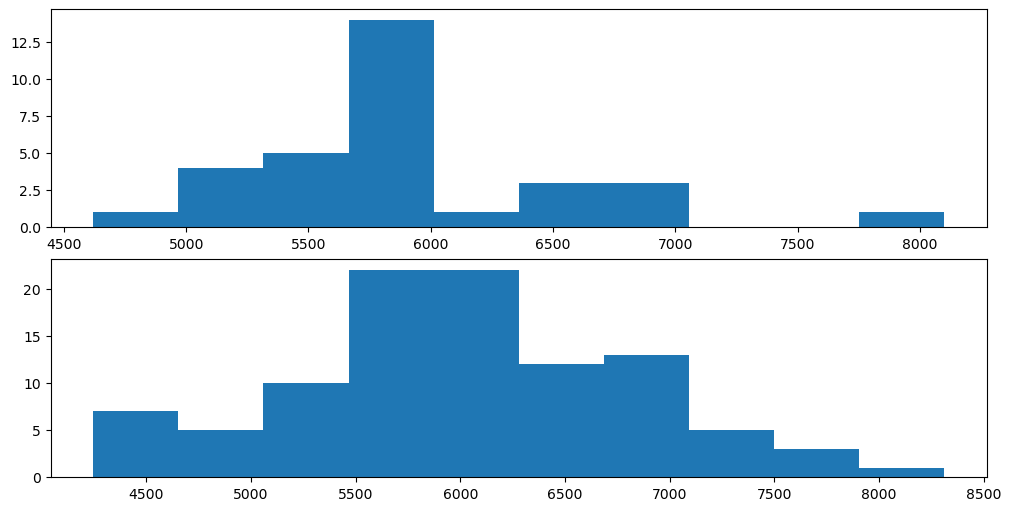

In [55]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, constrained_layout=True, figsize=(10, 5))
m_x_simulated = stats.norm.rvs(loc=m_norm_mean_hat, scale=m_norm_std_dev_hat, size=100)
ax1.hist(male_sal, bins=10)
ax2.hist(m_x_simulated, bins=10)

(array([ 1.,  8., 22., 10., 21., 12., 10., 10.,  4.,  2.]),
 array([4025.5222968 , 4265.43420471, 4505.34611262, 4745.25802052,
        4985.16992843, 5225.08183634, 5464.99374425, 5704.90565215,
        5944.81756006, 6184.72946797, 6424.64137588]),
 <BarContainer object of 10 artists>)

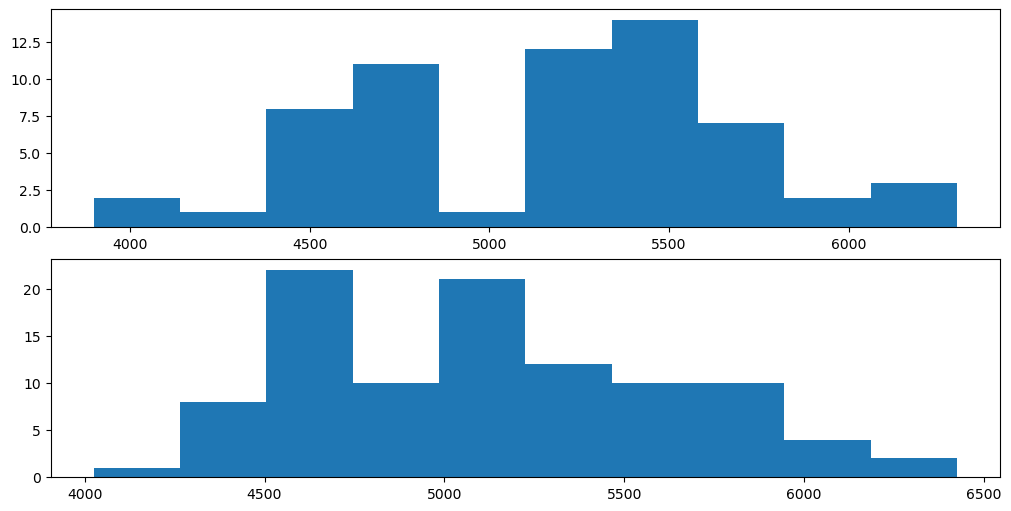

In [53]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, constrained_layout=True, figsize=(10, 5))
f_x_simulated = stats.norm.rvs(loc=f_norm_mean_hat, scale=f_norm_std_dev_hat, size=100)
ax1.hist(female_sal, bins=10)
ax2.hist(f_x_simulated, bins=10)